## Question 2: Real network data

### 2.1 Load the data

In [2]:
import networkx as nx

karate = nx.read_gml("/Users/xuanlong/Documents/program/python/src/xuanlong/alg/HKU_DATA8002/assignment01/dataset/karate/karate.gml", label='id')
football = nx.read_gml("/Users/xuanlong/Documents/program/python/src/xuanlong/alg/HKU_DATA8002/assignment01/dataset/football/football.gml", label='id')
polbooks = nx.read_gml("/Users/xuanlong/Documents/program/python/src/xuanlong/alg/HKU_DATA8002/assignment01/dataset/polbooks/polbooks.gml", label='id')

In [29]:
karate.nodes
football.nodes
polbooks.nodes


NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104))

### 2.2 Characters of Networks


Analysis for Karate Club Network
(a) Basic Statistics:
    Number of nodes: 34
    Number of edges: 78
    Average degree: 4.588
    Average clustering coefficient: 0.571

(b) Fast Greedy Community Detection:
    Number of communities: 3
    Modularity: 0.381

(d) Louvain Community Detection (Alternative Method):
    Number of communities: 3
    Modularity: 0.385


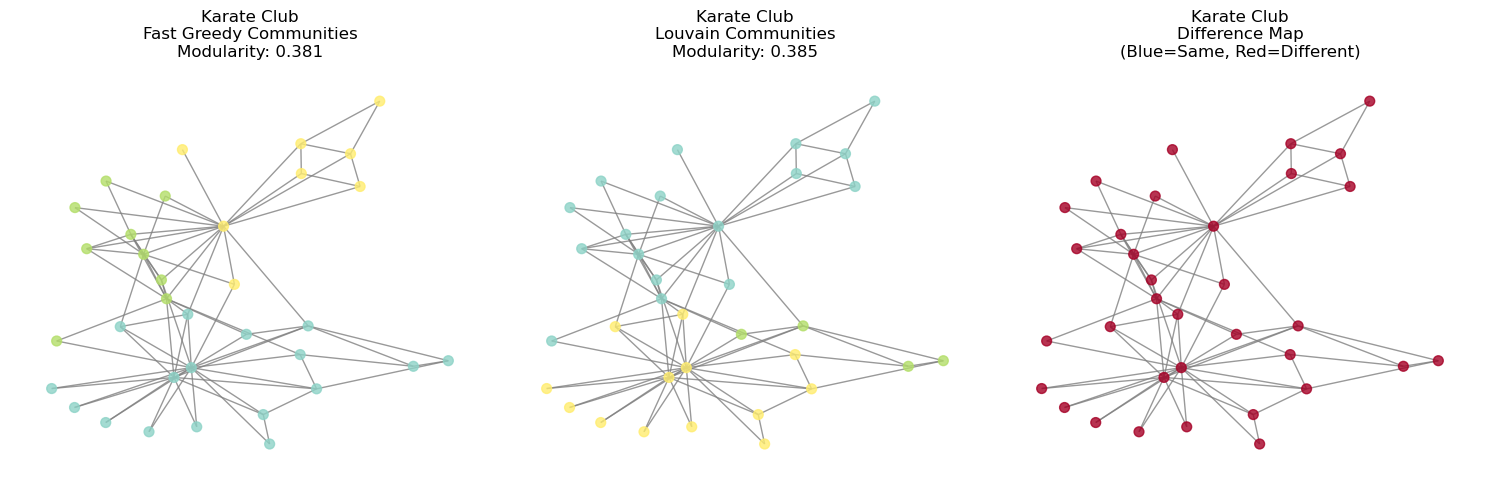


Comparison between Fast Greedy and Louvain:
    Nodes with same community assignment: 0/34 (0.0%)
    Nodes with different assignment: 34/34 (100.0%)
    Modularity difference: 0.005

Analysis for Football Network
(a) Basic Statistics:
    Number of nodes: 115
    Number of edges: 613
    Average degree: 10.661
    Average clustering coefficient: 0.403

(b) Fast Greedy Community Detection:
    Number of communities: 6
    Modularity: 0.550

(d) Louvain Community Detection (Alternative Method):
    Number of communities: 10
    Modularity: 0.605


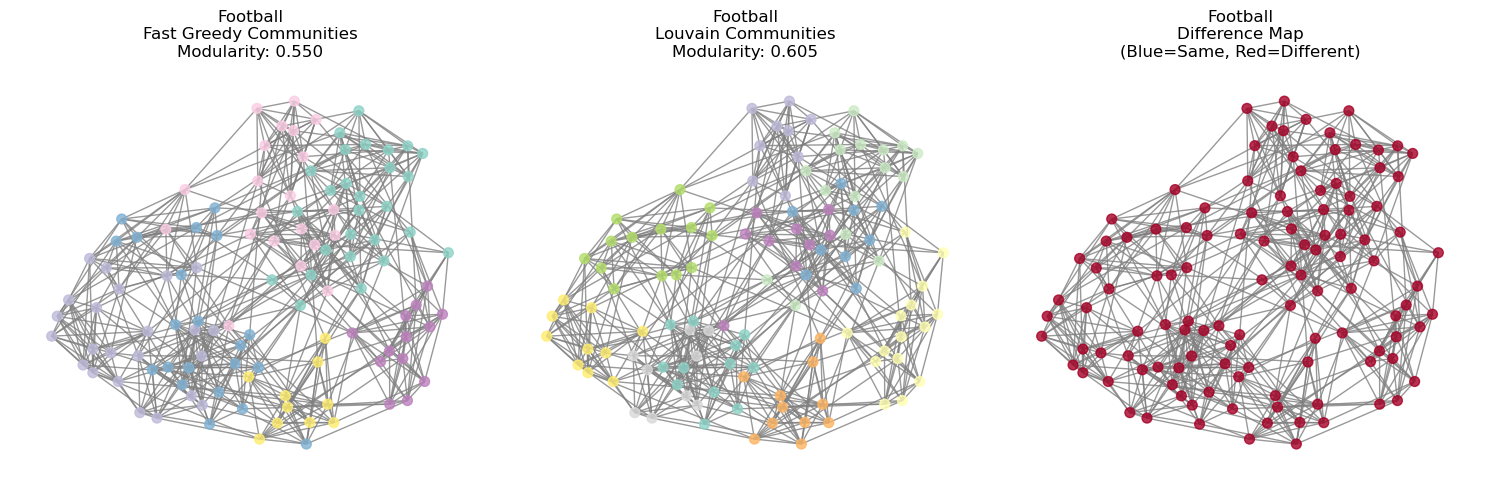


Comparison between Fast Greedy and Louvain:
    Nodes with same community assignment: 0/115 (0.0%)
    Nodes with different assignment: 115/115 (100.0%)
    Modularity difference: 0.055

Analysis for Political Books Network
(a) Basic Statistics:
    Number of nodes: 105
    Number of edges: 441
    Average degree: 8.400
    Average clustering coefficient: 0.488

(b) Fast Greedy Community Detection:
    Number of communities: 4
    Modularity: 0.502

(d) Louvain Community Detection (Alternative Method):
    Number of communities: 5
    Modularity: 0.527


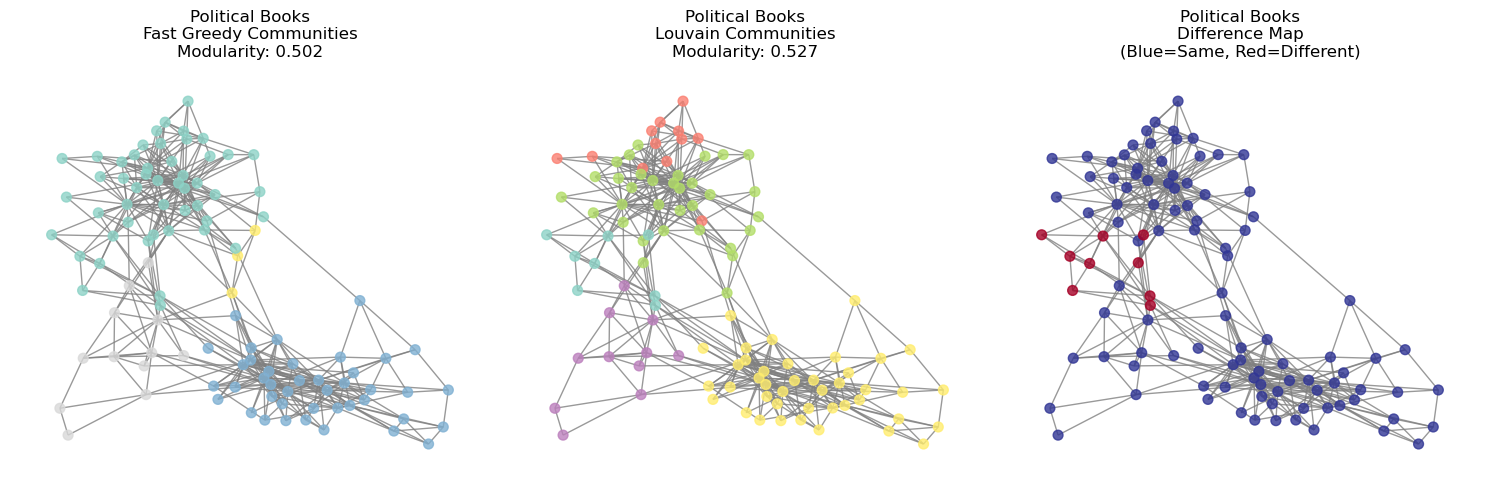


Comparison between Fast Greedy and Louvain:
    Nodes with same community assignment: 9/105 (8.6%)
    Nodes with different assignment: 96/105 (91.4%)
    Modularity difference: 0.025

SUMMARY COMPARISON
Network         Nodes    Edges    Avg Deg  Clust    Greedy Mod   Louvain Mod 
--------------------------------------------------------------------------------
Karate Club     34       78       4.59     0.571    0.381        0.385       
Football        115      613      10.66    0.403    0.550        0.605       
Political Books 105      441      8.40     0.488    0.502        0.527       


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community

# Load the networks
karate = nx.read_gml("/Users/xuanlong/Documents/program/python/src/xuanlong/alg/HKU_DATA8002/assignment01/dataset/karate/karate.gml", label='id')
football = nx.read_gml("/Users/xuanlong/Documents/program/python/src/xuanlong/alg/HKU_DATA8002/assignment01/dataset/football/football.gml", label='id')
polbooks = nx.read_gml("/Users/xuanlong/Documents/program/python/src/xuanlong/alg/HKU_DATA8002/assignment01/dataset/polbooks/polbooks.gml", label='id')

# Dictionary to store networks
networks = {'Karate Club': karate, 'Football': football, 'Political Books': polbooks}

def analyze_network(G, name):
    print(f"\n{'='*50}")
    print(f"Analysis for {name} Network")
    print(f"{'='*50}")
    
    # (a) Basic network statistics
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes
    avg_clustering = nx.average_clustering(G)
    
    print(f"(a) Basic Statistics:")
    print(f"    Number of nodes: {num_nodes}")
    print(f"    Number of edges: {num_edges}")
    print(f"    Average degree: {avg_degree:.3f}")
    print(f"    Average clustering coefficient: {avg_clustering:.3f}")
    
    # (b) Fast greedy community detection
    print(f"\n(b) Fast Greedy Community Detection:")
    greedy_communities = community.greedy_modularity_communities(G)
    greedy_modularity = community.modularity(G, greedy_communities)
    print(f"    Number of communities: {len(greedy_communities)}")
    print(f"    Modularity: {greedy_modularity:.3f}")
    
    # Create community labels for coloring
    greedy_labels = {}
    for i, comm in enumerate(greedy_communities):
        for node in comm:
            greedy_labels[node] = i
    
    # (c) Plot with fast greedy communities
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    pos = nx.spring_layout(G, seed=42)
    colors = [greedy_labels[node] for node in G.nodes()]
    nx.draw(G, pos, node_color=colors, cmap=plt.cm.Set3, node_size=50, 
            with_labels=False, edge_color='gray', alpha=0.8)
    plt.title(f'{name}\nFast Greedy Communities\nModularity: {greedy_modularity:.3f}')
    
    # (d) Louvain community detection (alternative method)
    print(f"\n(d) Louvain Community Detection (Alternative Method):")
    louvain_communities = community.louvain_communities(G, seed=42)
    louvain_modularity = community.modularity(G, louvain_communities)
    print(f"    Number of communities: {len(louvain_communities)}")
    print(f"    Modularity: {louvain_modularity:.3f}")
    
    # Create community labels for Louvain
    louvain_labels = {}
    for i, comm in enumerate(louvain_communities):
        for node in comm:
            louvain_labels[node] = i
    
    # Plot with Louvain communities
    plt.subplot(1, 3, 2)
    colors = [louvain_labels[node] for node in G.nodes()]
    nx.draw(G, pos, node_color=colors, cmap=plt.cm.Set3, node_size=50, 
            with_labels=False, edge_color='gray', alpha=0.8)
    plt.title(f'{name}\nLouvain Communities\nModularity: {louvain_modularity:.3f}')
    
    # Comparison plot showing difference
    plt.subplot(1, 3, 3)
    # Color nodes differently if they're in different communities between methods
    diff_colors = []
    for node in G.nodes():
        if greedy_labels[node] == louvain_labels[node]:
            diff_colors.append(0)  # Same community in both
        else:
            diff_colors.append(1)  # Different community assignment
    
    nx.draw(G, pos, node_color=diff_colors, cmap=plt.cm.RdYlBu, node_size=50, 
            with_labels=False, edge_color='gray', alpha=0.8)
    plt.title(f'{name}\nDifference Map\n(Blue=Same, Red=Different)')
    
    plt.tight_layout()
    plt.show()
    
    # Print differences analysis
    same_assignments = sum(1 for node in G.nodes() 
                          if greedy_labels[node] == louvain_labels[node])
    different_assignments = num_nodes - same_assignments
    
    print(f"\nComparison between Fast Greedy and Louvain:")
    print(f"    Nodes with same community assignment: {same_assignments}/{num_nodes} ({same_assignments/num_nodes*100:.1f}%)")
    print(f"    Nodes with different assignment: {different_assignments}/{num_nodes} ({different_assignments/num_nodes*100:.1f}%)")
    print(f"    Modularity difference: {abs(greedy_modularity - louvain_modularity):.3f}")
    
    return {
        'name': name,
        'stats': {
            'nodes': num_nodes,
            'edges': num_edges,
            'avg_degree': avg_degree,
            'avg_clustering': avg_clustering
        },
        'greedy': {
            'communities': len(greedy_communities),
            'modularity': greedy_modularity
        },
        'louvain': {
            'communities': len(louvain_communities),
            'modularity': louvain_modularity
        }
    }

# Analyze all networks
results = []
for name, G in networks.items():
    result = analyze_network(G, name)
    results.append(result)

# Summary comparison
print(f"\n{'='*60}")
print("SUMMARY COMPARISON")
print(f"{'='*60}")
print(f"{'Network':<15} {'Nodes':<8} {'Edges':<8} {'Avg Deg':<8} {'Clust':<8} {'Greedy Mod':<12} {'Louvain Mod':<12}")
print("-" * 80)
for result in results:
    print(f"{result['name']:<15} {result['stats']['nodes']:<8} {result['stats']['edges']:<8} "
          f"{result['stats']['avg_degree']:<8.2f} {result['stats']['avg_clustering']:<8.3f} "
          f"{result['greedy']['modularity']:<12.3f} {result['louvain']['modularity']:<12.3f}")

### 2.3 Using the Political Books network of this question

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import graph_tool.all as gt
from collections import defaultdict
import seaborn as sns

objc[38303]: Class GNotificationCenterDelegate is implemented in both /Users/xuanlong/anaconda3/envs/social_networks/lib/libgio-2.0.0.dylib (0x1834daf80) and /usr/local/Cellar/glib/2.84.3/lib/libgio-2.0.0.dylib (0x19b7d76c0). One of the two will be used. Which one is undefined.


In [5]:
polbooks = nx.read_gml("/Users/xuanlong/Documents/program/python/src/xuanlong/alg/HKU_DATA8002/assignment01/dataset/polbooks/polbooks.gml", label='id')

# Convert NetworkX to Graph-Tool
def nx_to_gt(G_nx):
    """Convert NetworkX graph to Graph-Tool graph"""
    G_gt = gt.Graph(directed=False)
    
    # Add vertices
    G_gt.add_vertex(G_nx.number_of_nodes())
    
    # Create node mapping
    nx_nodes = list(G_nx.nodes())
    node_map = {node: i for i, node in enumerate(nx_nodes)}
    
    # Add edges
    edges = [(node_map[u], node_map[v]) for u, v in G_nx.edges()]
    G_gt.add_edge_list(edges)
    
    # Store original node labels
    node_labels = G_gt.new_vertex_property("string")
    for i, node in enumerate(nx_nodes):
        node_labels[i] = str(node)
    G_gt.vertex_properties["node_labels"] = node_labels
    
    return G_gt, nx_nodes, node_map

# Convert the network
G_gt, nx_nodes, node_map = nx_to_gt(polbooks)

# Convert the network
G_gt, nx_nodes, node_map = nx_to_gt(polbooks)

print(f"Political Books Network:")
print(f"Nodes: {G_gt.num_vertices()}")
print(f"Edges: {G_gt.num_edges()}")

Political Books Network:
Nodes: 105
Edges: 441


In [6]:
print("\n=== Part (a): Bayesian MCMC Sampling ===")

# Initialize the Degree-Corrected Stochastic Block Model
state = gt.minimize_nested_blockmodel_dl(G_gt, state_args=dict(deg_corr=True))

# Prepare for MCMC sampling
n_samples = 1000
n_burnin = 200
entropies = []
partitions = []

print(f"Running MCMC sampling for {n_samples} iterations (after {n_burnin} burn-in)...")

# Run MCMC sampling
for i in range(n_samples + n_burnin):
    # Perform one MCMC step
    ret = state.mcmc_sweep(niter=1)
    
    # Record entropy after burn-in
    if i >= n_burnin:
        entropy = state.entropy()
        entropies.append(entropy)
        # Store partition (get the lowest level partition)
        partition = state.get_levels()[0].get_blocks().copy()
        partitions.append(partition.a.copy())
    
    if (i + 1) % 100 == 0:
        current_entropy = state.entropy()
        print(f"Iteration {i + 1}/{n_samples + n_burnin}, Entropy: {current_entropy:.2f}")

print(f"MCMC sampling completed. Collected {len(entropies)} samples.")


=== Part (a): Bayesian MCMC Sampling ===
Running MCMC sampling for 1000 iterations (after 200 burn-in)...
Iteration 100/1200, Entropy: 1347.58
Iteration 200/1200, Entropy: 1348.81
Iteration 300/1200, Entropy: 1347.15
Iteration 400/1200, Entropy: 1348.66
Iteration 500/1200, Entropy: 1356.55
Iteration 600/1200, Entropy: 1349.96
Iteration 700/1200, Entropy: 1352.25
Iteration 800/1200, Entropy: 1348.44
Iteration 900/1200, Entropy: 1346.64
Iteration 1000/1200, Entropy: 1344.98
Iteration 1100/1200, Entropy: 1348.31
Iteration 1200/1200, Entropy: 1348.74
MCMC sampling completed. Collected 1000 samples.



=== Part (b): Plotting Entropy Time Series ===


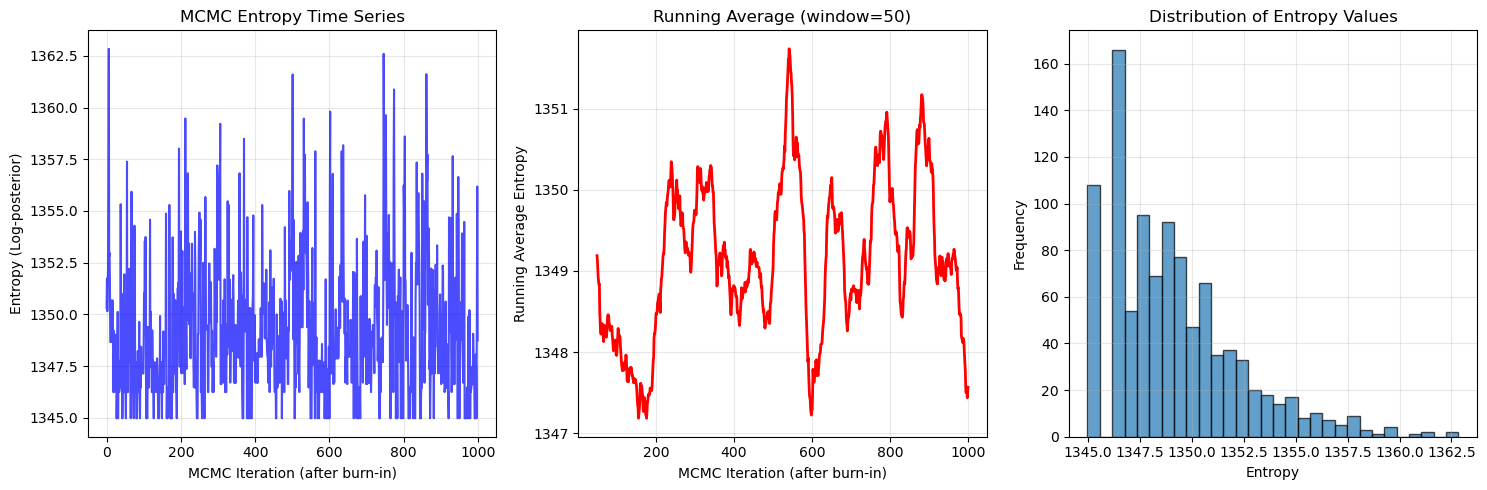


Thermalization Analysis:
Mean entropy: 1349.12
Std entropy: 3.14
Min entropy: 1344.98
Max entropy: 1362.84
First half mean: 1348.92, Second half mean: 1349.32
Difference: 0.40
Algorithm appears to have thermalized (difference < 0.5)


In [7]:
# Part (b): Plot entropy time series
print("\n=== Part (b): Plotting Entropy Time Series ===")

plt.figure(figsize=(15, 5))

# Plot 1: Full entropy time series
plt.subplot(1, 3, 1)
plt.plot(entropies, 'b-', alpha=0.7)
plt.xlabel('MCMC Iteration (after burn-in)')
plt.ylabel('Entropy (Log-posterior)')
plt.title('MCMC Entropy Time Series')
plt.grid(True, alpha=0.3)

# Plot 2: Running average to better see thermalization
window_size = 50
if len(entropies) > window_size:
    running_avg = np.convolve(entropies, np.ones(window_size)/window_size, mode='valid')
    plt.subplot(1, 3, 2)
    plt.plot(range(window_size-1, len(entropies)), running_avg, 'r-', linewidth=2)
    plt.xlabel('MCMC Iteration (after burn-in)')
    plt.ylabel('Running Average Entropy')
    plt.title(f'Running Average (window={window_size})')
    plt.grid(True, alpha=0.3)

# Plot 3: Histogram of entropy values
plt.subplot(1, 3, 3)
plt.hist(entropies, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Distribution of Entropy Values')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze thermalization
print(f"\nThermalization Analysis:")
print(f"Mean entropy: {np.mean(entropies):.2f}")
print(f"Std entropy: {np.std(entropies):.2f}")
print(f"Min entropy: {np.min(entropies):.2f}")
print(f"Max entropy: {np.max(entropies):.2f}")

# Check for convergence by looking at the first and second half
first_half = entropies[:len(entropies)//2]
second_half = entropies[len(entropies)//2:]
print(f"First half mean: {np.mean(first_half):.2f}, Second half mean: {np.mean(second_half):.2f}")
print(f"Difference: {abs(np.mean(first_half) - np.mean(second_half)):.2f}")

if abs(np.mean(first_half) - np.mean(second_half)) < 0.5:
    print("Algorithm appears to have thermalized (difference < 0.5)")
else:
    print("Algorithm may not be fully thermalized")



=== Part (c): Simulated Annealing for MAP Estimate ===
Running simulated annealing...
Annealing step 100/1000, T=5.0432, Entropy=1993.00
Annealing step 200/1000, T=2.5258, Entropy=1624.15
Annealing step 300/1000, T=1.2650, Entropy=1462.72
Annealing step 400/1000, T=0.6336, Entropy=1382.49
Annealing step 500/1000, T=0.3173, Entropy=1376.84
Annealing step 600/1000, T=0.1589, Entropy=1373.51
Annealing step 700/1000, T=0.0796, Entropy=1373.09
Annealing step 800/1000, T=0.0399, Entropy=1373.09
Annealing step 900/1000, T=0.0200, Entropy=1373.09
Annealing step 1000/1000, T=0.0100, Entropy=1373.09
Best entropy found: 1373.09


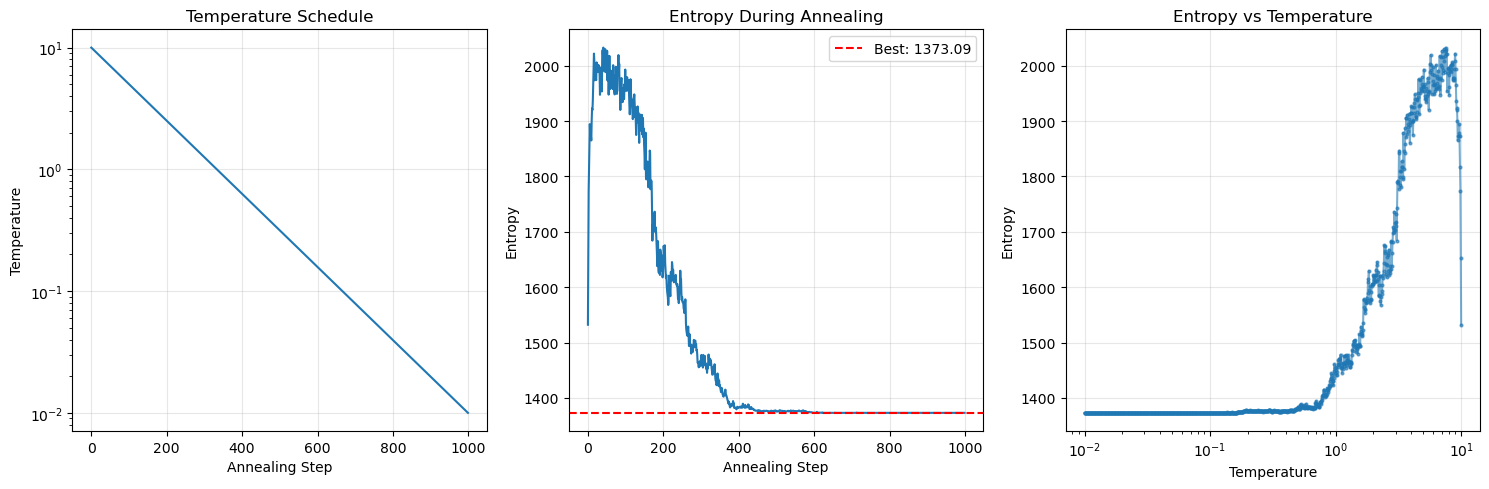

In [8]:

# Part (c): Simulated Annealing for MAP estimate
print("\n=== Part (c): Simulated Annealing for MAP Estimate ===")

# Reset to a new state for simulated annealing
map_state = gt.minimize_nested_blockmodel_dl(G_gt, state_args=dict(deg_corr=True))

# Run simulated annealing
print("Running simulated annealing...")

# Parameters for simulated annealing
n_anneal_steps = 1000
initial_temp = 10.0
final_temp = 0.01

# Temperature schedule (exponential cooling)
temps = initial_temp * (final_temp/initial_temp) ** (np.arange(n_anneal_steps) / (n_anneal_steps - 1))

anneal_entropies = []
best_entropy = float('inf')
best_state_partition = None

for i, temp in enumerate(temps):
    # Perform MCMC step with temperature
    ret = map_state.mcmc_sweep(beta=1.0/temp, niter=1)
    entropy = map_state.entropy()
    anneal_entropies.append(entropy)
    
    # Keep track of best partition
    if entropy < best_entropy:
        best_entropy = entropy
        best_state_partition = map_state.get_levels()[0].get_blocks().copy()
    
    if (i + 1) % 100 == 0:
        print(f"Annealing step {i + 1}/{n_anneal_steps}, T={temp:.4f}, Entropy={entropy:.2f}")

print(f"Best entropy found: {best_entropy:.2f}")

# Plot annealing progress
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(temps)
plt.xlabel('Annealing Step')
plt.ylabel('Temperature')
plt.title('Temperature Schedule')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(anneal_entropies)
plt.axhline(y=best_entropy, color='r', linestyle='--', label=f'Best: {best_entropy:.2f}')
plt.xlabel('Annealing Step')
plt.ylabel('Entropy')
plt.title('Entropy During Annealing')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(temps, anneal_entropies, 'o-', markersize=2, alpha=0.6)
plt.xlabel('Temperature')
plt.ylabel('Entropy')
plt.title('Entropy vs Temperature')
plt.xscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



=== Part (d): Plotting Network with MAP Partition ===
MAP estimate found 11 communities
Community sizes:
  Community 7: 5 nodes
  Community 9: 5 nodes
  Community 16: 11 nodes
  Community 23: 3 nodes
  Community 28: 5 nodes
  Community 38: 9 nodes
  Community 62: 6 nodes
  Community 66: 14 nodes
  Community 73: 15 nodes
  Community 100: 12 nodes
  Community 102: 20 nodes


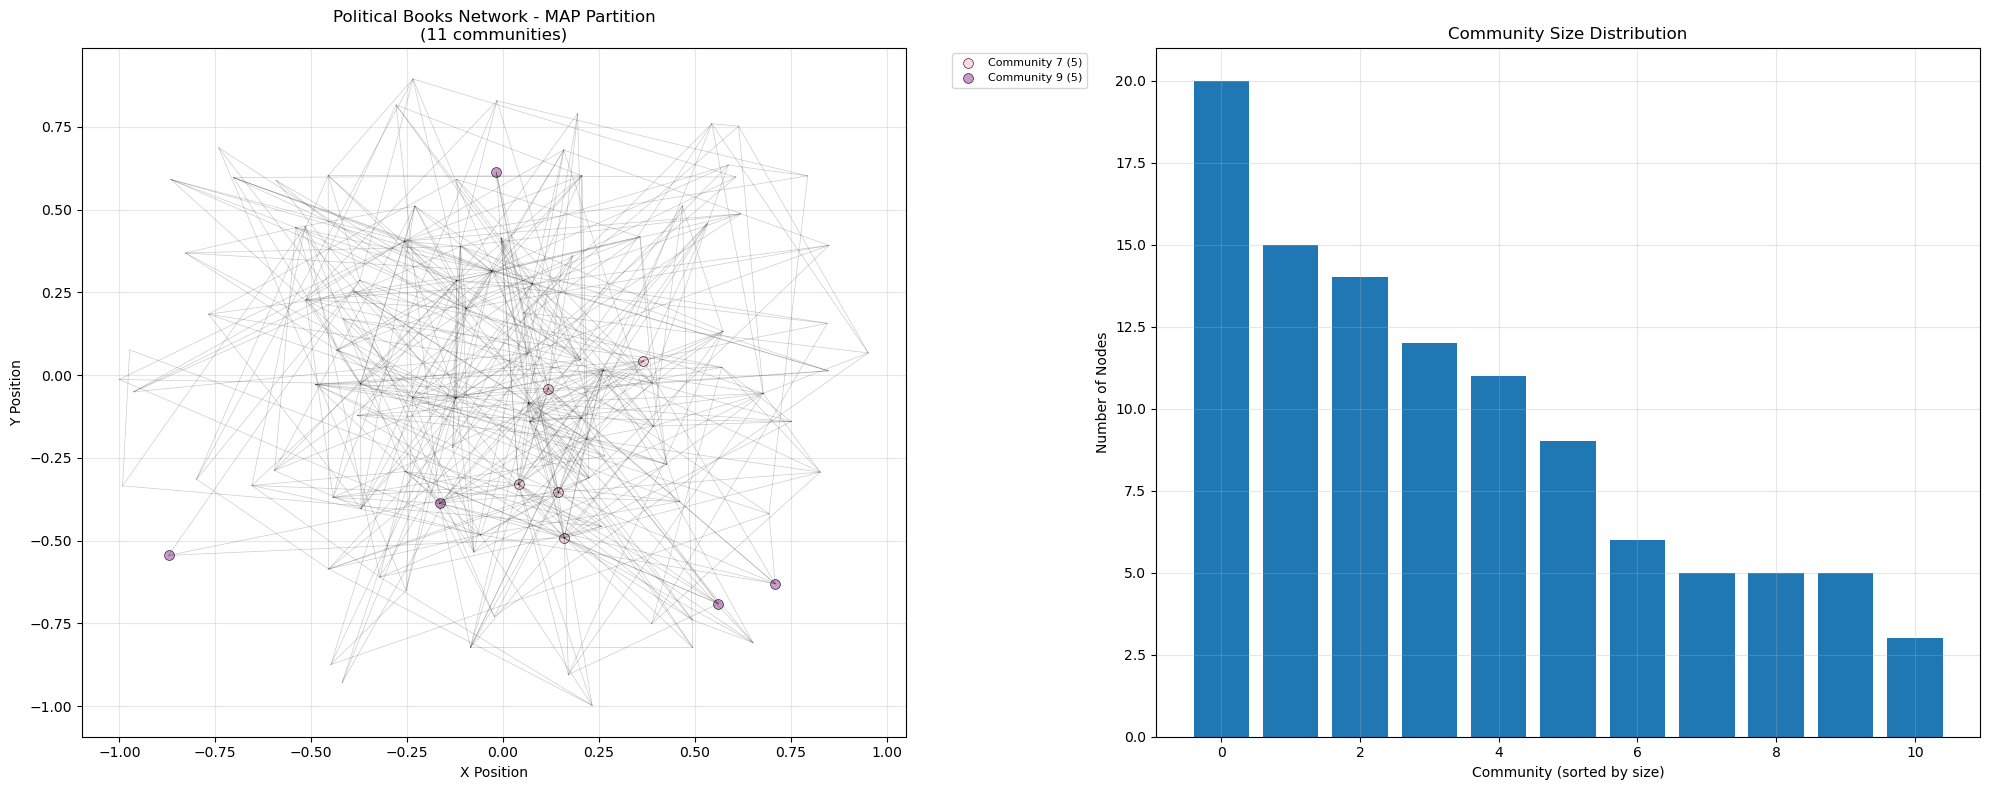


=== Comparison with Other Methods ===
Simple blockmodel found 6 communities
Nested Bayesian MAP method found 11 communities
Modularity of MAP partition: 0.2631
Modularity of simple partition: 0.2574
NetworkX greedy method found 4 communities
NetworkX modularity: 0.5020

=== Final Summary ===
Network: Political Books
Nodes: 105
Edges: 441
MCMC samples collected: 1000
Final MCMC entropy: 1348.74
Best annealing entropy: 1373.09
MAP communities found: 11
Largest community size: 20
Smallest community size: 3

=== Node Attributes Analysis ===
Sample node data: (0, {'label': '1000 Years for Revenge', 'value': 'n'})
Found 'value' attribute (likely political leaning)
Political leaning vs Community mapping:
  Political value n: {62: 2, 23: 2, 73: 3, 9: 2, 16: 4}
  Political value c: {62: 4, 38: 9, 73: 12, 102: 20, 23: 1, 16: 2, 9: 1}
  Political value l: {7: 5, 66: 14, 16: 5, 9: 2, 28: 5, 100: 12}


In [9]:
# Part (d): Plot network with MAP partition
print("\n=== Part (d): Plotting Network with MAP Partition ===")

# Get the MAP partition (use the best partition found)
map_partition = best_state_partition if best_state_partition is not None else map_state.get_levels()[0].get_blocks()
n_communities = len(set(map_partition.a))

print(f"MAP estimate found {n_communities} communities")

# Print community sizes
community_sizes = {}
for v in G_gt.vertices():
    comm = map_partition[v]
    community_sizes[comm] = community_sizes.get(comm, 0) + 1

print("Community sizes:")
for comm, size in sorted(community_sizes.items()):
    print(f"  Community {comm}: {size} nodes")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Network with MAP communities
ax1 = axes[0]

# Use spring layout from NetworkX for consistent positioning
pos_nx = nx.spring_layout(polbooks, k=1, iterations=50, seed=42)

# Convert positions to match Graph-Tool vertices
pos_gt = {}
for i, nx_node in enumerate(nx_nodes):
    pos_gt[i] = pos_nx[nx_node]

# Create color map for communities
colors = plt.cm.Set3(np.linspace(0, 1, max(12, n_communities)))

# Plot edges
for e in G_gt.edges():
    source_idx = int(e.source())
    target_idx = int(e.target())
    source_pos = pos_gt[source_idx]
    target_pos = pos_gt[target_idx]
    ax1.plot([source_pos[0], target_pos[0]], 
             [source_pos[1], target_pos[1]], 
             'k-', alpha=0.2, linewidth=0.5)

# Plot vertices colored by community
for community in range(n_communities):
    vertices_in_comm = [v for v in G_gt.vertices() if map_partition[v] == community]
    if vertices_in_comm:
        comm_pos = np.array([pos_gt[int(v)] for v in vertices_in_comm])
        ax1.scatter(comm_pos[:, 0], comm_pos[:, 1], 
                   c=[colors[community % len(colors)]], s=50, 
                   label=f'Community {community} ({len(vertices_in_comm)})', 
                   alpha=0.8, edgecolors='black', linewidth=0.5)

ax1.set_title(f'Political Books Network - MAP Partition\n({n_communities} communities)')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)

# Plot 2: Community size distribution
ax2 = axes[1]
sizes = list(community_sizes.values())
ax2.bar(range(len(sizes)), sorted(sizes, reverse=True))
ax2.set_xlabel('Community (sorted by size)')
ax2.set_ylabel('Number of Nodes')
ax2.set_title('Community Size Distribution')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare with other methods
print("\n=== Comparison with Other Methods ===")

try:
    # Simple non-nested blockmodel for comparison
    simple_state = gt.minimize_blockmodel_dl(G_gt,state_args=dict(deg_corr=False))
    simple_partition = simple_state.get_blocks()
    n_communities_simple = len(set(simple_partition.a))
    
    print(f"Simple blockmodel found {n_communities_simple} communities")
    print(f"Nested Bayesian MAP method found {n_communities} communities")
    
    # Calculate modularity for both partitions
    modularity_map = gt.modularity(G_gt, map_partition)
    modularity_simple = gt.modularity(G_gt, simple_partition)

    print(f"Modularity of MAP partition: {modularity_map:.4f}")
    print(f"Modularity of simple partition: {modularity_simple:.4f}")
    
    # Also compare with NetworkX community detection
    import networkx.algorithms.community as nx_comm
    
    # Greedy modularity maximization
    nx_communities = nx_comm.greedy_modularity_communities(polbooks)
    nx_modularity = nx_comm.modularity(polbooks, nx_communities)
    
    print(f"NetworkX greedy method found {len(nx_communities)} communities")
    print(f"NetworkX modularity: {nx_modularity:.4f}")
    
except Exception as e:
    print(f"Error in comparison: {e}")

# Summary statistics
print(f"\n=== Final Summary ===")
print(f"Network: Political Books")
print(f"Nodes: {G_gt.num_vertices()}")
print(f"Edges: {G_gt.num_edges()}")
print(f"MCMC samples collected: {len(entropies)}")
print(f"Final MCMC entropy: {entropies[-1]:.2f}")
print(f"Best annealing entropy: {best_entropy:.2f}")
print(f"MAP communities found: {n_communities}")
print(f"Largest community size: {max(community_sizes.values())}")
print(f"Smallest community size: {min(community_sizes.values())}")

# Additional analysis: look at node attributes if available
if hasattr(polbooks, 'nodes') and len(polbooks.nodes(data=True)) > 0:
    print(f"\n=== Node Attributes Analysis ===")
    sample_node = list(polbooks.nodes(data=True))[0]
    print(f"Sample node data: {sample_node}")
    
    # If there's a 'value' attribute (political leaning), analyze it
    if 'value' in polbooks.nodes[list(polbooks.nodes())[0]]:
        print("Found 'value' attribute (likely political leaning)")
        
        # Map political values to communities
        value_to_community = {}
        for i, nx_node in enumerate(nx_nodes):
            if 'value' in polbooks.nodes[nx_node]:
                political_value = polbooks.nodes[nx_node]['value']
                community = map_partition[i]
                if political_value not in value_to_community:
                    value_to_community[political_value] = {}
                value_to_community[political_value][community] = value_to_community[political_value].get(community, 0) + 1
        
        print("Political leaning vs Community mapping:")
        for value, comm_counts in value_to_community.items():
            print(f"  Political value {value}: {dict(comm_counts)}")